In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers = 2, tol=1e-6, eps=0.05, embedtxt=True)

In [3]:
pf.session.load_data(name='ttt', src=FILE, fpath='./hce_data/australian/australian.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[0.0113067626953125] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'empty', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "A1": "numeric",
    "A2": "numeric",
    "A3": "numeric",
    "A4": "numeric",
    "A5": "numeric",
    "A6": "numeric",
    "A7": "numeric",
    "A8": "numeric",
    "A9": "numeric",
    "A10": "numeric",
    "A11": "numeric",
    "A12": "numeric",
    "A13": "numeric",
    "A14": "numeric",
    "A15": "numeric"
}
INFO:profiler.data.dataset:(possible types: numeric, categorical, text, date)
INFO:profiler.data.dataset:inferred operators of attributes: {'A1': ['equal'], 'A2': ['equal'], 'A3': ['equal'], 'A4': ['equal'], 'A5': ['equal'], 'A6': ['equal'], 'A7': ['equal'], 'A8': ['equal'], 'A9': ['equal'], 'A10': ['equal'], 'A11': ['equal'], 'A12

In [4]:
# pf.session.change_dtypes(['tls', 'ZipCode', 'PhoneNumber', 'State', 'EmergencyService','Score', 'Sample'], 
#                             [CATEGORICAL, NUMERIC, CATEGORICAL, TEXT, TEXT, NUMERIC, NUMERIC],
#                             [None, None, None, None, None, r'(\d+)%', r'(\d+)\spatients'])

In [5]:
pf.session.load_training_data(multiplier = None)

INFO:profiler.utility:[0.05966329574584961] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 12 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:use multiplier = 12, and the bound is 0.00128383
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 15/15 [00:00<00:00, 398.97it/s]
INFO:profiler.data.transformer:Number of training samples: 10350
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[0.24941802024841309] Create Training Data execution time: 0.18975472450256348



In [6]:
# set sparsity to 0 for exp_reproduce 
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[0.2549607753753662] Learn Structure start

INFO:profiler.learner:use threshold 1.0506
INFO:profiler.utility:[0.3670954704284668] Learn Structure execution time: 0.11213469505310059



In [7]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[0.37295079231262207] Get Dependencies start

INFO:profiler.utility:[0.39984846115112305] Get Dependencies execution time: 0.026897668838500977



A8 -> A15 (0.18510157074127115)
A10 -> A14 (0.1388021799022502)
A10 -> A9 (0.12178893513478203)


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


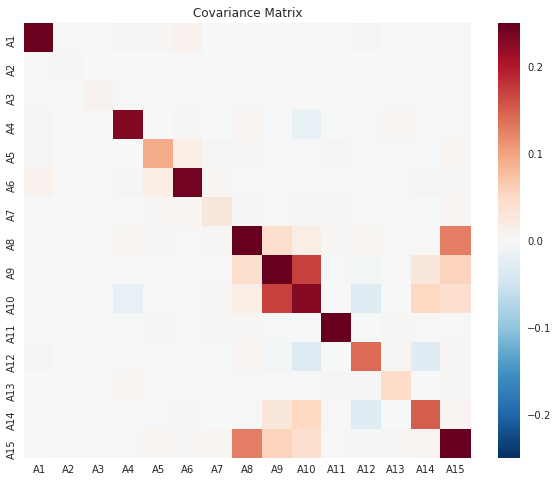

In [8]:
pf.session.visualize_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


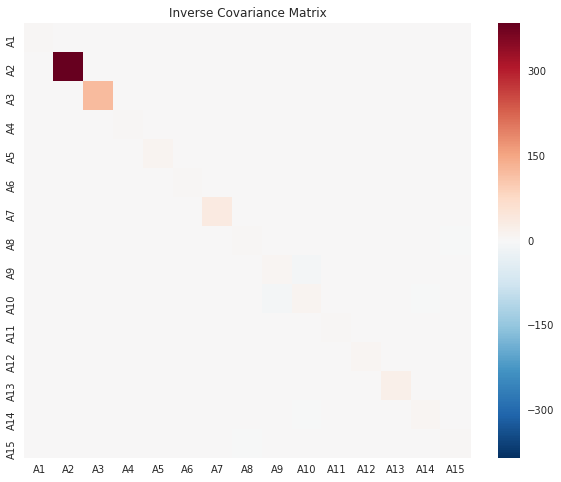

threshold =  30
sum =  [ 0.          0.          0.          0.          0.          0.
  0.          2.72233499  6.71731128 10.16649238  0.          2.70754164
  0.          3.10104473  2.72233499]
attr =  Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15'],
      dtype='object')
Attr w/o dependency: 
 Index([['A1'], ['A2'], ['A3'], ['A4'], ['A5'], ['A6'], ['A7'], ['A8'], ['A9'],
       ['A10'], ['A11'], ['A12'], ['A13'], ['A14'], ['A15']],
      dtype='object')


Attr w/ dependency: 
 Index([], dtype='object')


In [9]:
pf.session.visualize_inverse_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


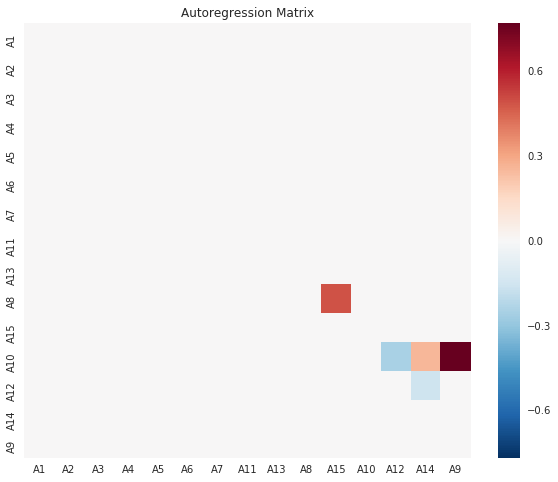

In [10]:
pf.session.visualize_autoregression()

In [11]:
pf.session.timer.get_stat()

,time_point,msg,execution_time
0,0.011307,start: Load Data,0.000000
1,0.043272,end: Load Data,0.031965
2,0.059663,start: Create Training Data,0.000000
3,0.249418,end: Create Training Data,0.189755
4,0.254961,start: Learn Structure,0.000000
5,0.367095,end: Learn Structure,0.112135
6,0.372951,start: Get Dependencies,0.000000
7,0.399848,end: Get Dependencies,0.026898
8,0.399848,total_execution_time,0.360752


In [12]:
pf.session.timer.to_csv()